In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from scipy.special import expit

In [32]:
from utils import rating

In [34]:
pd.options.mode.chained_assignment = None  # default='warn'

In [35]:
match_df =  pd.read_pickle('../../data/processed/football_results.pkl')

seasons and names look reasonable

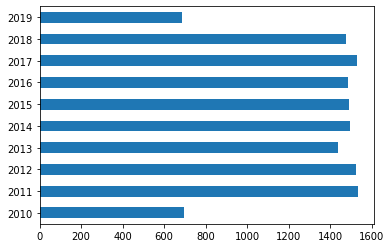

In [36]:
match_df.Date.dt.year.value_counts().sort_index().plot.barh()

In [40]:
elo_outcome = rating.ELO(fixtures=match_df, target='result_val',player_1='HomeTeam',player_2='AwayTeam',rater_name='elo_outcome',hyperparams={'k_factor':10})

In [41]:
match_with_elo_df,ratings = elo_outcome.process_all_fixtures()

In [58]:
match_with_elo_df.loc[:,['Date','HomeTeam','AwayTeam','elo_outcome_rating_1',
       'elo_outcome_rating_2', 'elo_outcome_e']].to_pickle('../../data/processed/team_elos.pkl')